In [1]:
#importing necessary pacakages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#Reading the first five 5 rows from the data
df = pd.read_csv(r"C:\Users\bathena naga tanuja\Documents\StudentsPerformance (1).csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Analysing the given dataframe :

In [2]:
print(df.shape)
print(df.size)
print(df.info())
df.describe()     #Last line is printed by default hence print statement is not required

(1000, 8)
8000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [3]:
#Checking for Null values in the given data
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

This means that there are no null values in the given data in any column.

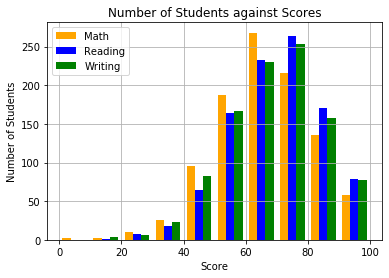

In [4]:
#Brief outlook of the given dataframe 
plt.hist([df['math score'],df['reading score'],df['writing score']], color=['orange', 'blue', 'green'])
plt.title('Number of Students against Scores')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.legend(['Math', 'Reading', 'Writing'])
plt.grid(True)
plt.show()

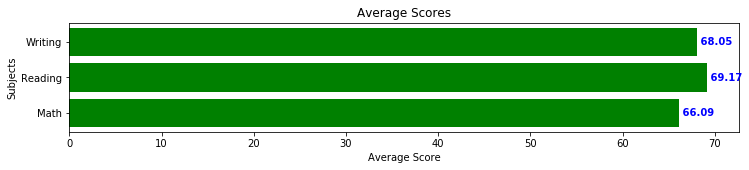

In [5]:
#Calculating the average score in each subject:
y = ['Math','Reading','Writing']
width = [df['math score'].mean(),df['reading score'].mean(),df['writing score'].mean()]
plt.figure(figsize = (12,2))
plt.barh(y = y,width = width,color='green')
plt.title('Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Subjects')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(round(v,2)), color='blue', va='center', fontweight='bold')
plt.show()

It is clear from the above two plots that the No.of students who has high score in Maths has dropped below reading and writing. Also the average score in Maths is less that both reading and writing. From this we may infer that scoring in maths is more difficult that reading and writing.

In [6]:
df_fail = df[(df['math score'] < 40) | (df['reading score'] < 40) | (df['writing score'] < 40)]
df_fail.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
7,male,group B,some college,free/reduced,none,40,43,39
9,female,group B,high school,free/reduced,none,38,60,50
17,female,group B,some high school,free/reduced,none,18,32,28
33,male,group D,some college,standard,none,40,42,38
55,female,group C,high school,free/reduced,none,33,41,43


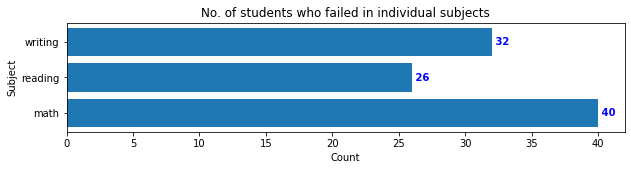

In [7]:
width = [df_fail[df_fail['math score'] < 40]['gender'].count(), df_fail[df_fail['reading score']< 40]['gender'] .count(), 
    df_fail[df_fail['writing score'] < 40]['gender'] .count()]

y = ['math','reading','writing']

plt.figure(figsize = (10,2))
plt.barh(y = y,width = width)
plt.title('No. of students who failed in individual subjects')
plt.xlabel('Count')
plt.ylabel('Subject')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
plt.show()

This plot supports the fact that it is difficult to score in Maths than both Reading and Writing

# Covariance and Correlation

Text(0.5, 1, 'Covariance Plot')

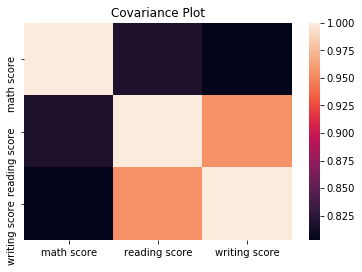

In [8]:
#Covariance plot
sns.heatmap(df.corr())
plt.title('Covariance Plot')

In [9]:
#Correlation among numeric columns
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


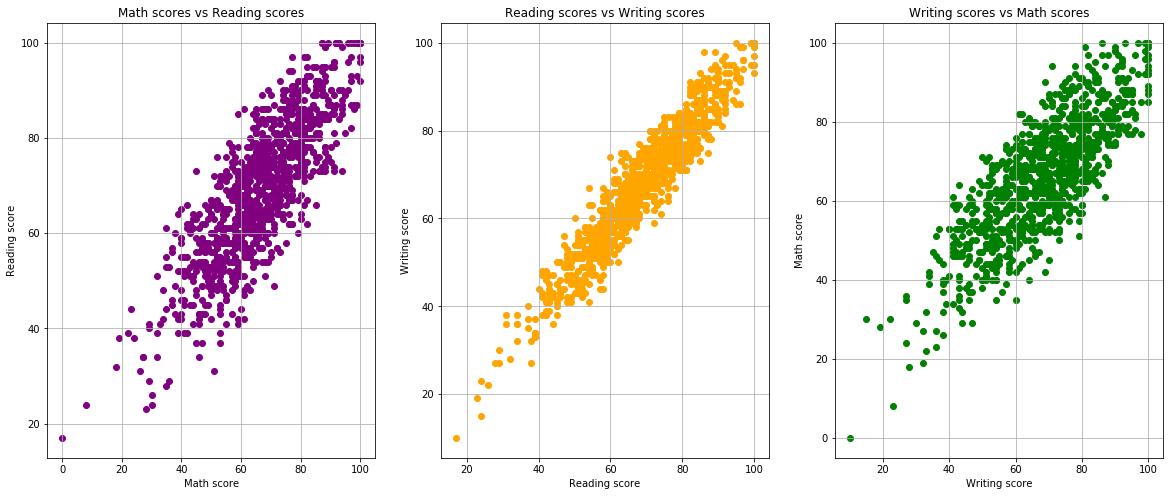

In [10]:
#Scatter plot of scores in different subjects to visualize correlation among them
plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
plt.scatter(df['math score'],df['reading score'],color='purple')
plt.title('Math scores vs Reading scores')
plt.xlabel('Math score')
plt.ylabel('Reading score')
plt.grid(True)

plt.subplot(1,3,2)
plt.scatter(df['reading score'],df['writing score'],color='orange')
plt.title('Reading scores vs Writing scores')
plt.xlabel('Reading score')
plt.ylabel('Writing score')
plt.grid(True)

plt.subplot(1,3,3)
plt.scatter(df['writing score'],df['math score'],color='green')
plt.title('Writing scores vs Math scores')
plt.xlabel('Writing score')
plt.ylabel('Math score')
plt.grid(True)

plt.show()


# Analysis of data on gender basis

In [11]:
df_gender = df.groupby('gender')

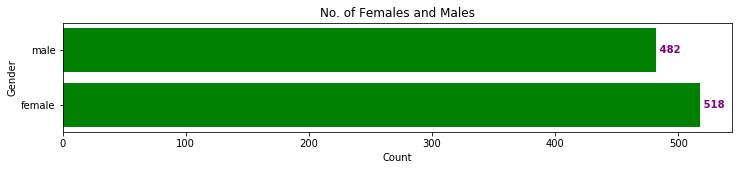

In [12]:
#Just a count on Number of Males and Females
y = df_gender['gender'].count().keys()
width = df_gender['gender'].count()
plt.figure(figsize = (12,2))
plt.barh(y = y, width = width,color='green')
plt.title('No. of Females and Males')
plt.xlabel('Count')
plt.ylabel('Gender')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='purple', va='center', fontweight='bold')
plt.show()

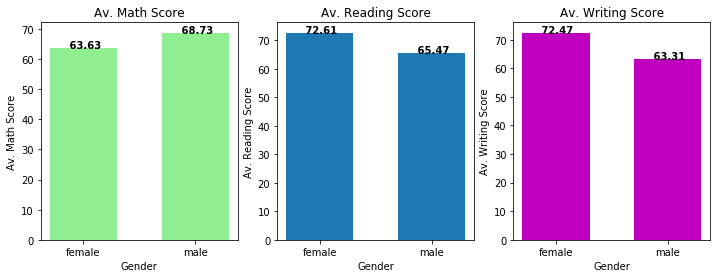

In [13]:
# Average scores in each subject for males and females
x = df_gender['gender'].count().keys()

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
height = df_gender['math score'].mean()
plt.bar(x = x,height = height,color='lightgreen',width=0.6)
plt.title('Av. Math Score')
plt.xlabel('Gender')
plt.ylabel('Av. Math Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='k', ha='center', fontweight='bold')

plt.subplot(1,3,2)
height = df_gender['reading score'].mean()
plt.bar(x = x,height = height,width=0.6)
plt.title('Av. Reading Score')
plt.xlabel('Gender')
plt.ylabel('Av. Reading Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='k', ha='center', fontweight='bold')

plt.subplot(1,3,3)
height = df_gender['writing score'].mean()
plt.bar(x = x,height = height,color='m',width=0.6)
plt.title('Av. Writing Score')
plt.xlabel('Gender')
plt.ylabel('Av. Writing Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='k', ha = 'center', fontweight='bold')

plt.show()

In [14]:
#Adding a column of total score in the dataframe for deep insights and better analysis
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [1]:
#Average scores of Females and Males
y = df_gender['total score'].mean().keys()
width = df_gender['total score'].mean()
plt.figure(figsize = (12,2))
plt.barh(y = y,width = width,color='purple',height=0.6)
plt.title('Avg score of Female and Males')
plt.xlabel('Avg total score out of 300')
plt.ylabel('Gender')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(round(v,2)), color='k', va='center', fontweight='bold')
plt.show()

NameError: name 'df_gender' is not defined

From the above graph it can be inferred that Female students have performed well compared to male students.

In [ ]:
#Box plot 
sns.boxplot(x="gender", y="total score", data=df)

In [ ]:
#Violin plot
sns.violinplot(x='gender',y='total score',data=df,inner='quartile',color='lightgreen')

# Analyzing scores based on Race/Ethnicity

In [ ]:
df_race = df.groupby('race/ethnicity')

In [ ]:
#Count of studensts belonging to different race/ethnicity groups using bar graph
y = df_race['race/ethnicity'].count().keys()
width = df_race['race/ethnicity'].count()
plt.figure(figsize = (12,4))
plt.barh(y = y,width = width)
plt.title('No. of Students of Different Race/Ethnicity Groups')
plt.xlabel('Count')
plt.ylabel('Race/Ethnicity')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
plt.show()

In [ ]:
#Count of studensts belonging to different race/ethnicity groups using pie chart
import matplotlib.pyplot as plt
import numpy as np
#group = df.groupby('race/ethnicity').size()
groups = ['group A\n(89)', 'group B\n[190]', 'group C\n[319]', 'group D\n[262]', 'group E\n[140]']
data = [89,190,319,262,240]
fig = plt.figure(figsize =(10, 7))
plt.pie(data,shadow=True,labels=groups, autopct='%.2f',explode=(0.0,0.0,0.1,0.0,0.0),colors=['orange','blue','lightgreen','m','red'])


In [ ]:
#Average scores in individual subject based on Race/Ethnicity
x = df_race['total score'].mean().keys()

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
height = df_race['math score'].mean()
plt.bar(x = x,height = height,color='orange',width=0.5)
plt.title('Avg Math Score')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Avg Math Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha='center', fontweight='bold')

plt.subplot(1,3,2)
height = df_race['reading score'].mean()
plt.bar(x = x,height = height,color='blue',width=0.5)
plt.title('Avg Reading Score')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Avg Reading Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha='center', fontweight='bold')

plt.subplot(1,3,3)
height = df_race['writing score'].mean()
plt.bar(x = x,height = height,color='green',width=0.5)
plt.title('Avg Writing Score')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Avg Writing Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha = 'center', fontweight='bold')

plt.show()


These plots show that students belonging to group E have performed well in all the subjects while group A students perforemed worst in all the subjects 

In [ ]:
#Average score of students in different race/ethnicity groups
y = df_race['total score'].mean().keys()
width = df_race['total score'].mean()
plt.figure(figsize = (12,4))
plt.barh(y = y,width = width,color='grey')
plt.title('Mean Scores of Students of Different Race/Ethnicity Groups')
plt.xlabel('Mean score')
plt.ylabel('Race/Ehtnicity')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(round(v,2)), color='k', va='center', fontweight='bold')
plt.show()

From this we can say that Group E students performed the best and Group A students performed the worst.

In [ ]:
plt.figure(figsize = (12,4))
sns.boxplot(x="race/ethnicity", y="total score", data=df)

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='race/ethnicity',y='total score',data=df, inner=None,color='lightgreen')

# Analyzing Scores based on Parental Level of Education

In [ ]:
df_parental = df.groupby('parental level of education')

In [ ]:
#Counting students based on the parental level of education by bar graph
y = df_parental['parental level of education'].count().keys()
width = df_parental['parental level of education'].count()
plt.figure(figsize = (12,4))
plt.barh(y = y,width = width)
plt.title('No. of Students based on parental level of education')
plt.xlabel('Count')
plt.ylabel('Parental level of education')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
plt.show()

In [ ]:
#PIE CHART
import matplotlib.pyplot as plt
import numpy as np
#group = df.groupby('race/ethnicity').size()
groups = ['Some high school\n[179]','some college\n[226]','masters degree\n[59]','high school\n[196]','bachelors degree\n[118]','associates degree\n[222]']
data = [179,226,59,196,118,222]
fig = plt.figure(figsize =(10, 7))
plt.pie(data,shadow=True,labels=groups, autopct='%.2f',explode=(0.0,0.1,0.0,0.0,0.0,0.0),colors=['orange','blue','lightgreen','m','red','grey'])


In [ ]:
#Mean scores of students in individual subjects based on parental level of education 
x = df_parental['total score'].mean().keys()

plt.figure(figsize=(20,18))

plt.subplot(3,1,1)
height = df_parental['math score'].mean()
plt.bar(x = x,height = height,color='y',width=0.4)
plt.title('Avg Math Score')
plt.xlabel('parental level if education')
plt.ylabel('Avg Math Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha='center', fontweight='bold')

plt.subplot(3,1,2)
height = df_parental['reading score'].mean()
plt.bar(x = x,height = height,width=0.4,color='purple')
plt.title('Avg Reading Score')
plt.xlabel('parental level if education')
plt.ylabel('Avg Reading Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha='center', fontweight='bold')

plt.subplot(3,1,3)
height = df_parental['writing score'].mean()
plt.bar(x = x,height = height,width=0.4,color='green')
plt.title('Avg Writing Score')
plt.xlabel('parental level if education')
plt.ylabel('Avg Writing Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha = 'center', fontweight='bold')
plt.show()

In [ ]:
#Mean score of students based on the parental level of education
y = df_parental['total score'].mean().keys()
width = df_parental['total score'].mean()
plt.figure(figsize = (12,4))
plt.barh(y = y,width = width,color='y')
plt.title('Mean score of Students based on parental level of education')
plt.xlabel('Mean total score')
plt.ylabel('Parental levelof education')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(round(v,2)), color='blue', va='center', fontweight='bold')
plt.show()

From this we may infer that Education level of parents effected the performance of the students to some extent

In [ ]:
#Box plot
plt.figure(figsize = (12,4))
sns.boxplot(x="parental level of education", y="total score", data=df)

# Analysis of scores based on Lunch

In [ ]:
df_lunch = df.groupby('lunch')

In [ ]:
# Counting students according to lunch type
y = df_lunch['lunch'].count().keys()
width = df_lunch['lunch'].count()
plt.figure(figsize = (10,2))
plt.barh(y = y,width = width,height=0.6,color='orange')
plt.title('No. of Students acc. to lunch type')
plt.xlabel('Count')
plt.ylabel('Lunch')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
plt.show()

In [ ]:
#Mean scores of students in individual subjects based on lunch
x = df_lunch['total score'].mean().keys()

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
height = df_lunch['math score'].mean()
plt.bar(x = x,height = height,width=0.5,color='green')
plt.title('Av. Math Score')
plt.xlabel('Gender')
plt.ylabel('Av. Math Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha='center', fontweight='bold')

plt.subplot(1,3,2)
height = df_lunch['reading score'].mean()
plt.bar(x = x,height = height,width=0.5,)
plt.title('Avg Reading Score')
plt.xlabel('Gender')
plt.ylabel('Avg Reading Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha='center', fontweight='bold')

plt.subplot(1,3,3)
height = df_lunch['writing score'].mean()
plt.bar(x = x,height = height,width=0.5,color='red')
plt.title('Avg Writing Score')
plt.xlabel('Gender')
plt.ylabel('Avg Writing Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha = 'center', fontweight='bold')

plt.show()

In [ ]:
#Mean score of students according to lunch type
y = df_lunch['total score'].mean().keys()
width = df_lunch['total score'].mean()
plt.figure(figsize = (10,2))
plt.barh(y = y,width = width,height=0.6,color='b')
plt.title('Mean total score of Students in Different Lunch categories')
plt.xlabel('Mean total score')
plt.ylabel('Lunch')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(round(v,2)), color='y', va='center', fontweight='bold')
plt.show()

From this we can infer that students who consume standard lunch are performing better than those who consume free/reduced lunch

In [ ]:
plt.figure(figsize = (8,4))
sns.boxplot(x="lunch", y="total score", data=df)

# Analyzing students scores based on Test preparation course

In [ ]:
df_test = df.groupby('test preparation course')

In [ ]:
#Count of students based on test preparation course
y = df_test['test preparation course'].count().keys()
width = df_test['test preparation course'].count()
plt.figure(figsize = (10,2))
plt.barh(y = y, width = width,height=0.6,color='y')
plt.title('No. of Students with and without test preparation course')
plt.xlabel('Count')
plt.ylabel('Test preparation course')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
plt.show()

In [ ]:
#Individual scores based on test preparation course
x = df_test['total score'].mean().keys()

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
height = df_test['math score'].mean()
plt.bar(x = x, height = height,width=0.5,color='grey')
plt.title('Avg Math Score')
plt.xlabel('Test preparation course')
plt.ylabel('Avg Math Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='k', ha='center', fontweight='bold')

plt.subplot(1,3,2)
height = df_test['reading score'].mean()
plt.bar(x = x,height = height,width=0.5,color='brown')
plt.title('Avg Reading Score')
plt.xlabel('Test preparation course')
plt.ylabel('AvgReading Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='k', ha='center', fontweight='bold')

plt.subplot(1,3,3)
height = df_test['writing score'].mean()
plt.bar(x = x,height = height,width=0.5,color='green')
plt.title('Avg Writing Score')
plt.xlabel('Test preparation course')
plt.ylabel('Avg Writing Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='k', ha = 'center', fontweight='bold')

plt.show()

In [ ]:
#Mean scores of students based on test preparation course
y = df_test['total score'].mean().keys()
width = df_test['total score'].mean()
plt.figure(figsize = (10,2))
plt.barh(y = y,width = width,height=0.6,color='purple')
plt.title('Mean total score of Students with and without a test preparation course')
plt.xlabel('Mean total score')
plt.ylabel('Test preparation course')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(round(v,2)), color='blue', va='center', fontweight='bold')
plt.show()

This shows that students who took test preparation course performed better than those who didn't.

In [ ]:
plt.figure(figsize = (8,4))
sns.boxplot(x="test preparation course", y="total score", data=df)

In [ ]:
df_fail_all = df[(df['math score'] < 40) & (df['reading score'] < 40) & (df['writing score'] < 40)]
df_fail_all.head()

In [ ]:
y = df['test preparation course'].unique().tolist()
x = [0]*len(y)
for i in range(len(y)):
    x[i] += df_fail_all[df_fail_all['test preparation course'] == y[i]]['gender'].count()
width = x

plt.figure(figsize = (10,2))
plt.barh(y = y,width = width,height=0.5)
plt.title('No. of students who failed all subjects based on test preparation course')
plt.xlabel('Count')
plt.ylabel('Test preparation course')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
plt.show()

Conclusion:
1. Female students perform better than male students on the whole whereas male students did well in maths 
2. Considering the groups Group E performed well while group A the least in all the subjects .
3. High parental control improves the score of the students
4. Consumption of standard lunch seems to help with the performance of the students
5. Test preparation has helped the students to score more.